In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")

In [4]:
df.shape

(100, 5)

In [7]:
df.head()

,education,gender,questionnaire score(EQ),gradeof software,grade of questionnaire score(EQ)
0,1,1,148,19,5
1,1,1,131,17,4
2,1,1,126,16,3
3,1,1,135,17,4
4,1,1,132,16,4


In [8]:
df.columns

Index(['education', 'gender', 'questionnaire score(EQ)', 'gradeof software',
       'grade of questionnaire score(EQ)'],
      dtype='object')

In [9]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
education                           100 non-null int64
gender                              100 non-null int64
questionnaire score(EQ)             100 non-null int64
grade of questionnaire score(EQ)    100 non-null int64
dtypes: int64(4)
memory usage: 3.2 KB


K- min - 0.0 and max - 6.21! big difference. Could explain the outliers.

In [11]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


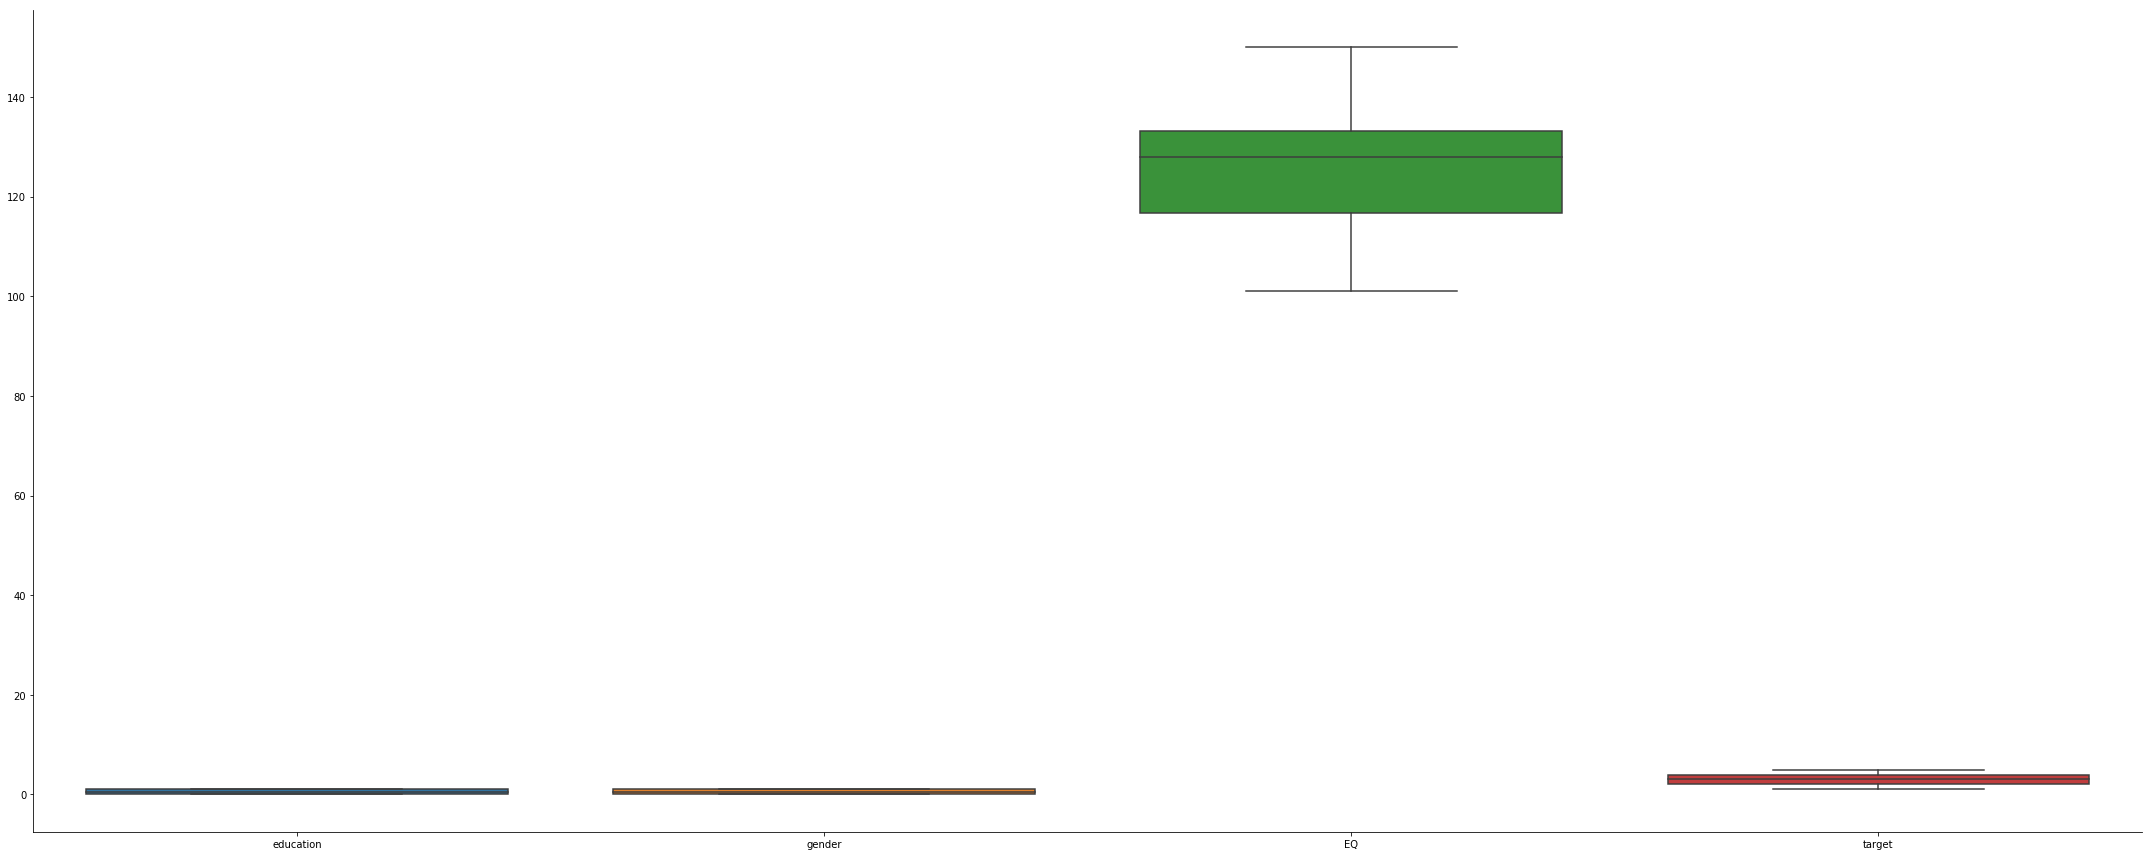

In [12]:
sns.factorplot(data=df,kind='box',size=12,aspect=2.5)

In [13]:
df.groupby(by='target').count().T

target,1,2,3,4,5
education,14,18,30,28,10
gender,14,18,30,28,10
EQ,14,18,30,28,10


In [14]:
df["target"].value_counts()

3    30
4    28
2    18
1    14
5    10
Name: target, dtype: int64

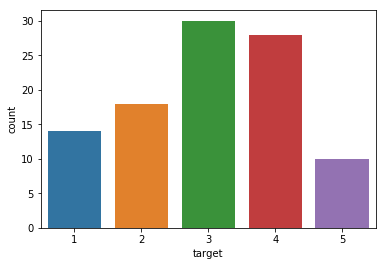

In [15]:
sns.countplot(df["target"])

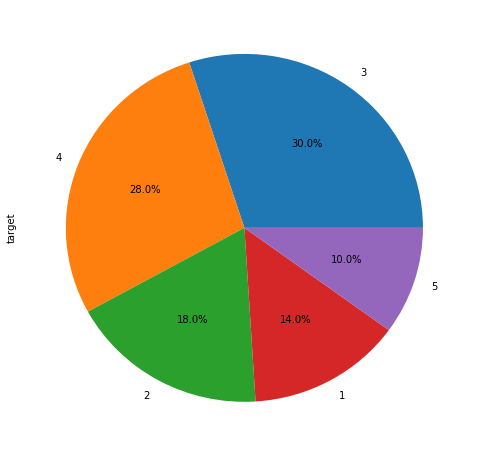

In [16]:
plt.figure(1, figsize=(8,8))
df["target"].value_counts().plot.pie(autopct="%1.1f%%")

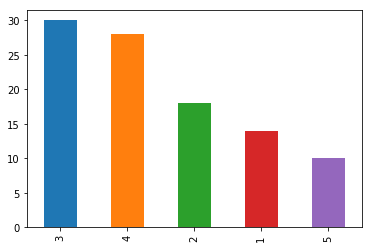

In [17]:
df["target"].value_counts().plot(kind='bar')

In [18]:
df["target"].value_counts()*100/len(df)

3    30.0
4    28.0
2    18.0
1    14.0
5    10.0
Name: target, dtype: float64

In [19]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='target',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='target',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

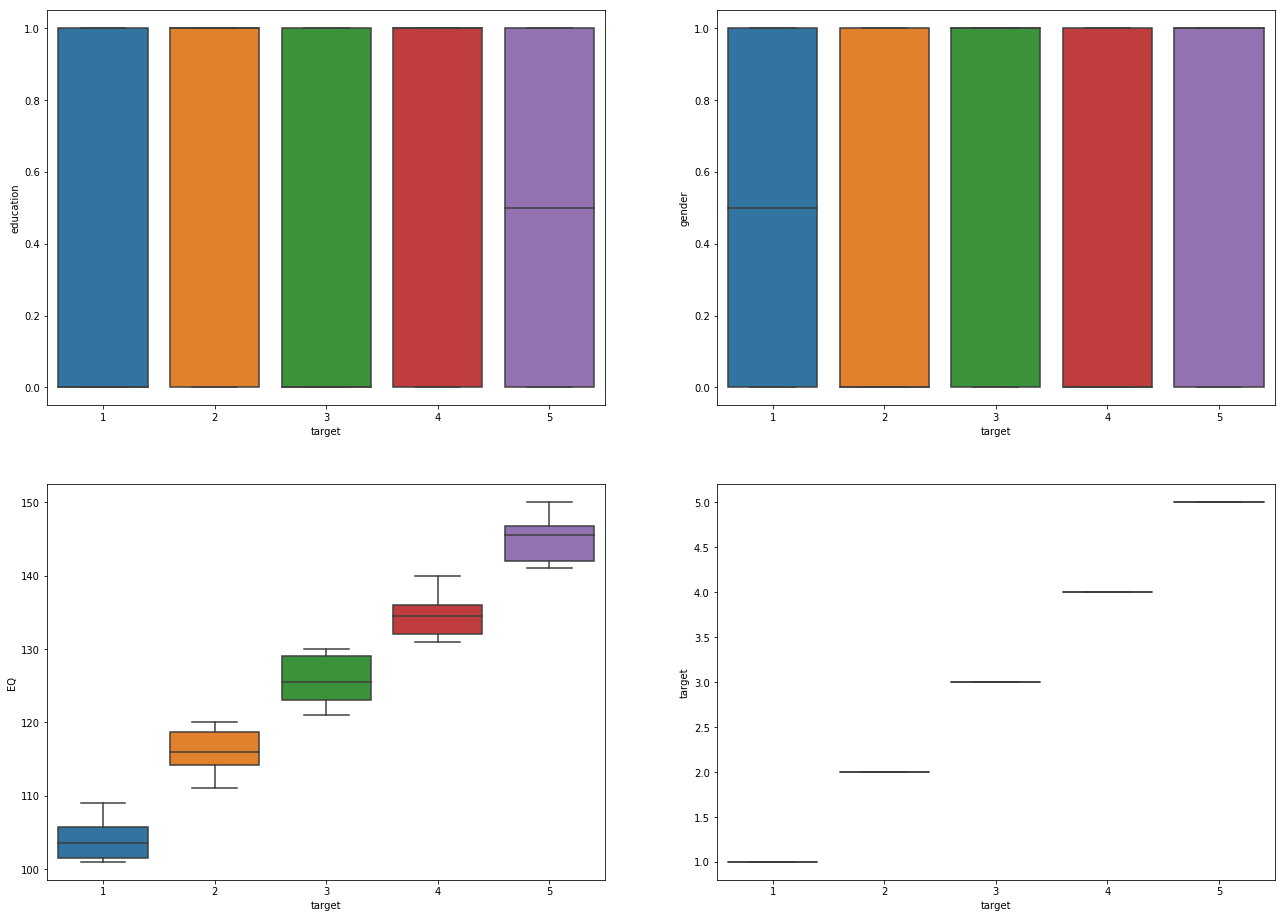

In [21]:
draw_multivarient_plot(df,2,2,"box")

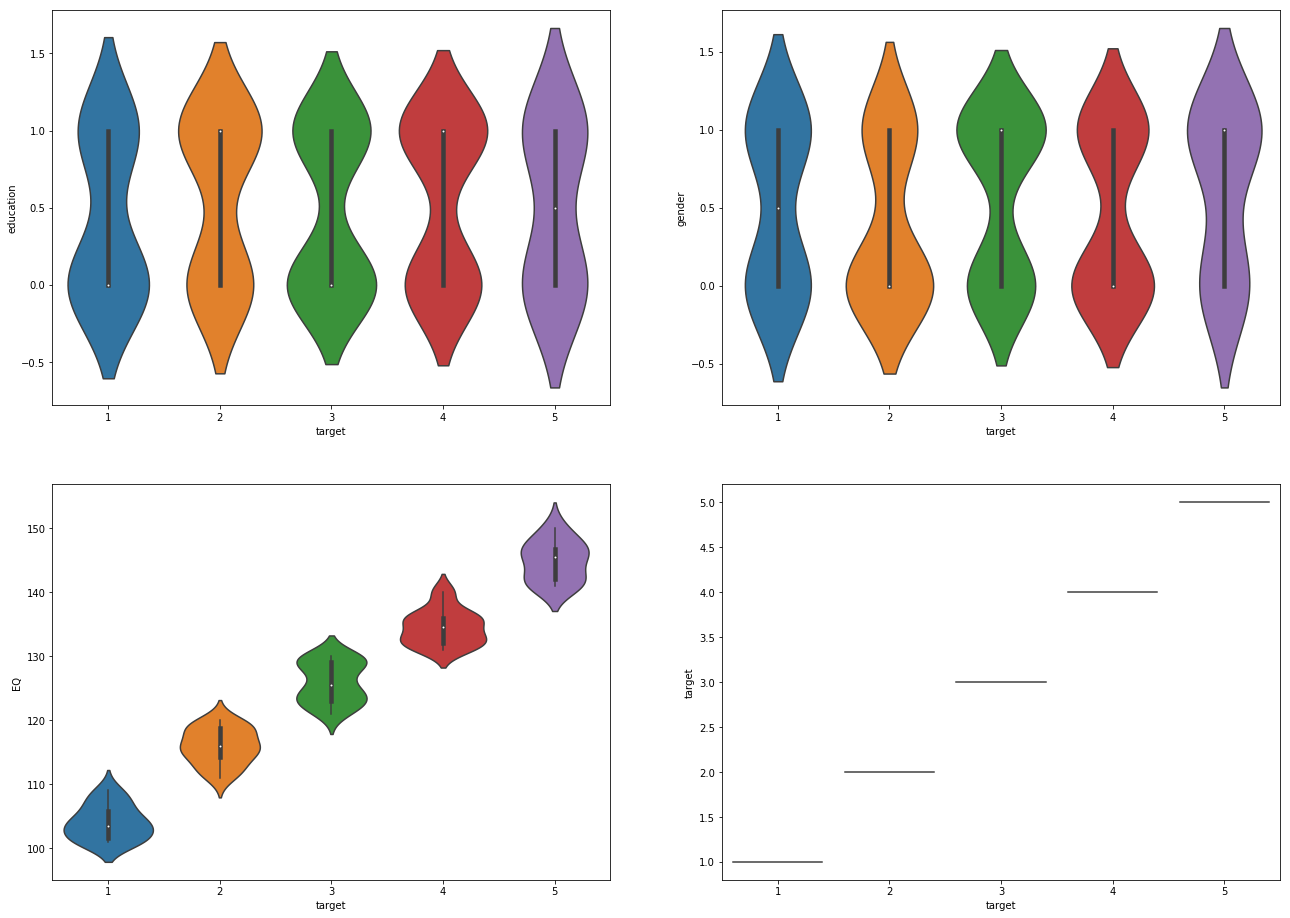

In [22]:
draw_multivarient_plot(df,2,2,"violin")

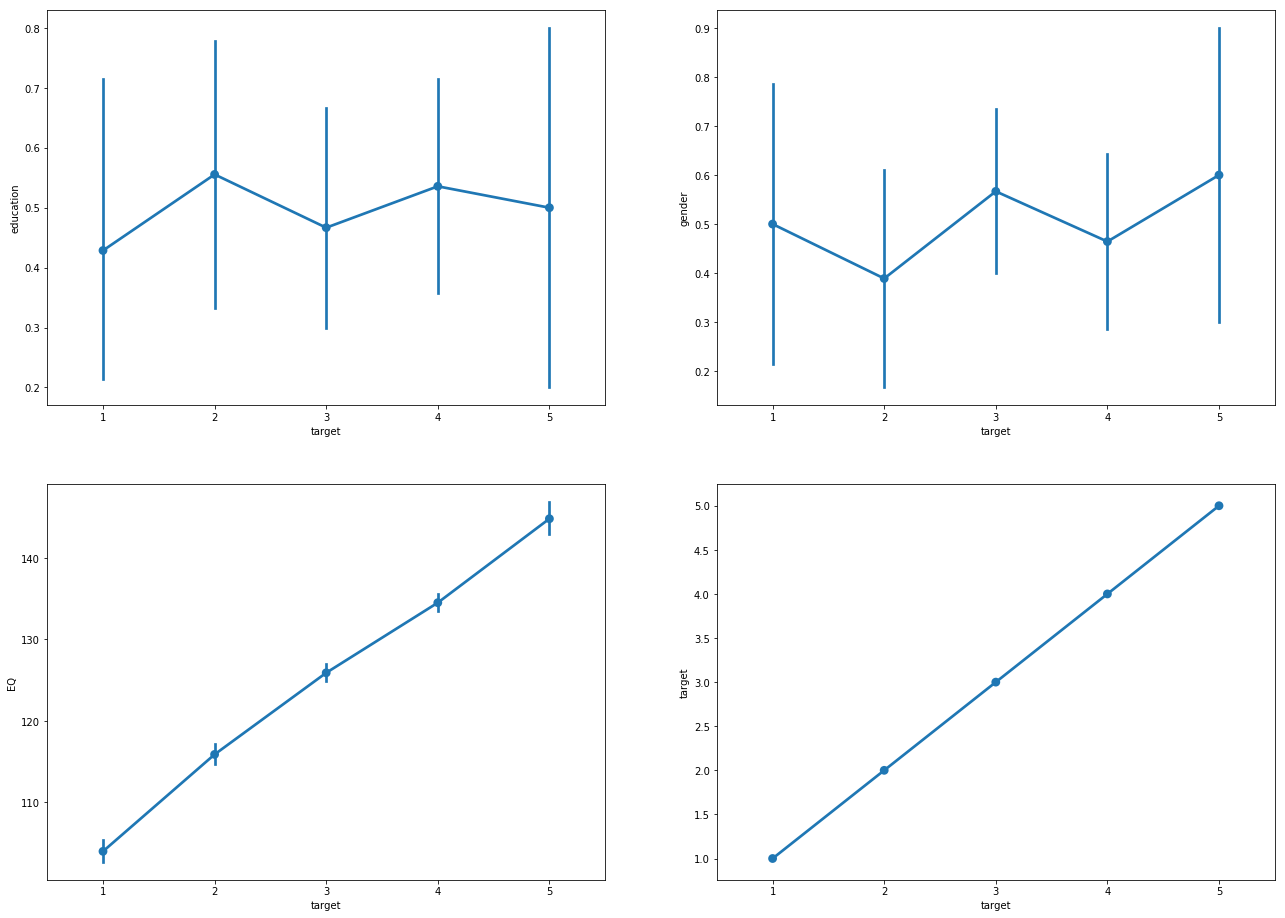

In [23]:
draw_multivarient_plot(df,2,2,"point")

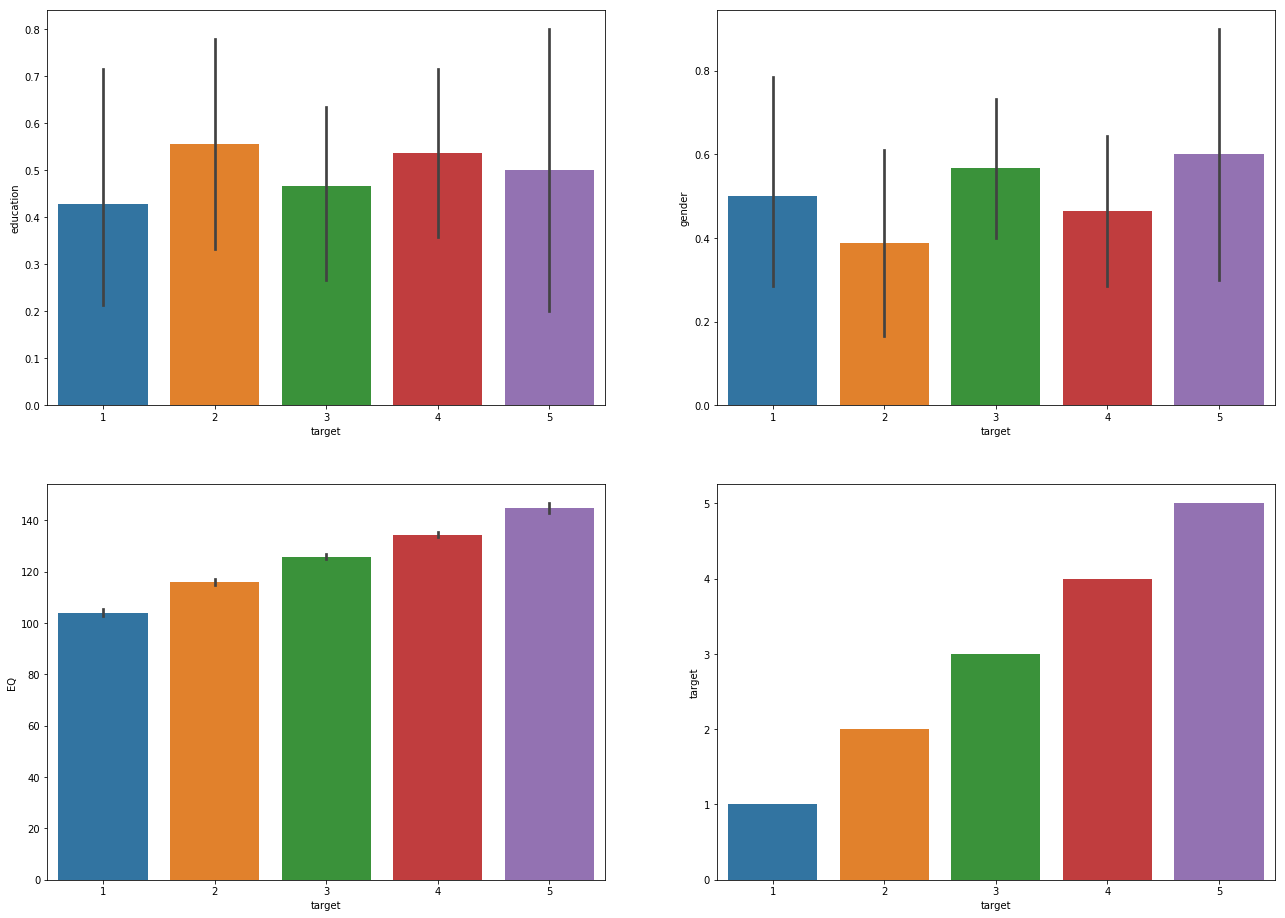

In [24]:
draw_multivarient_plot(df,2,2,"bar")

In [25]:
df.corr()

,education,gender,EQ,target
education,1.000000,0.000000,0.020457,0.033572
gender,0.000000,1.000000,0.081011,0.050358
EQ,0.020457,0.081011,1.000000,0.970675
target,0.033572,0.050358,0.970675,1.000000


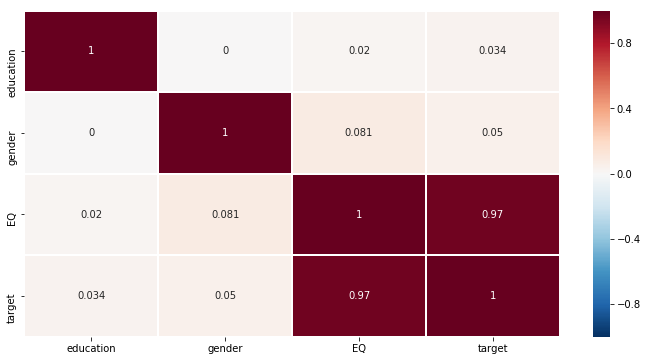

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, linewidths=1,  vmin=-1, cmap="RdBu_r")

In [27]:
correlation = df.corr()
correlation['target'].sort_values(ascending=False)

target       1.000000
EQ           0.970675
gender       0.050358
education    0.033572
Name: target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002677676B898>,
      dtype=object)

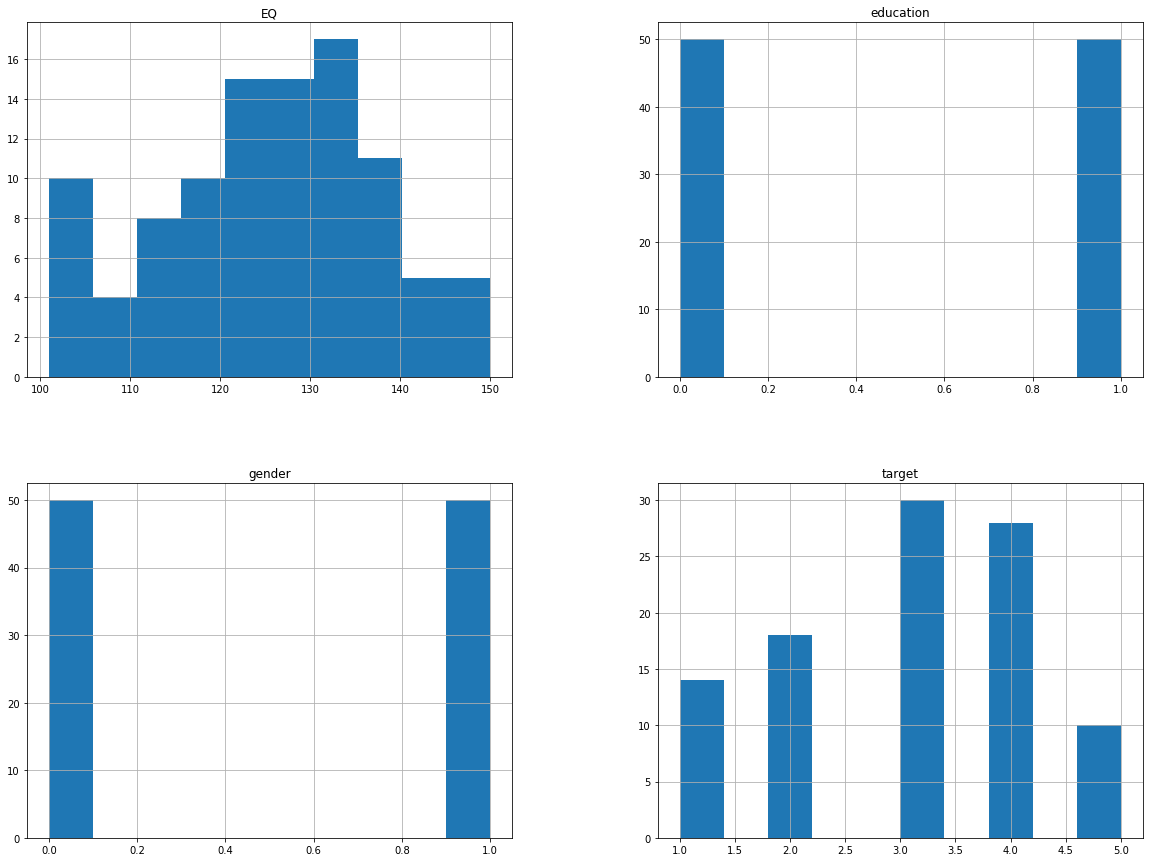

In [28]:
df.hist(figsize=(20,15))

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


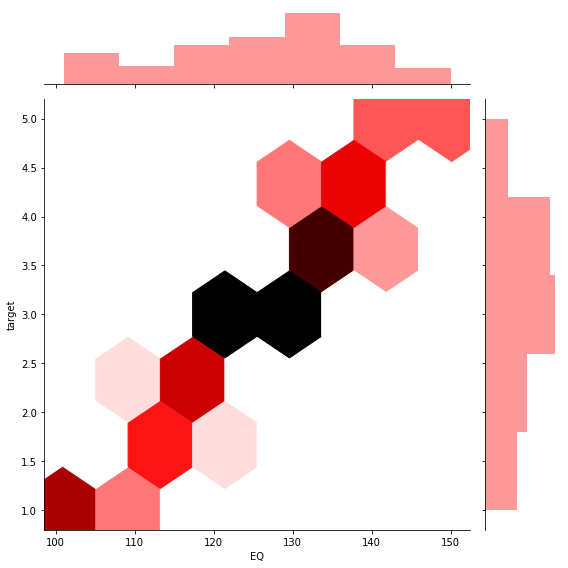

In [30]:
sns.jointplot(x='EQ', y='target', data=df, kind='hex', color='red', size=8)

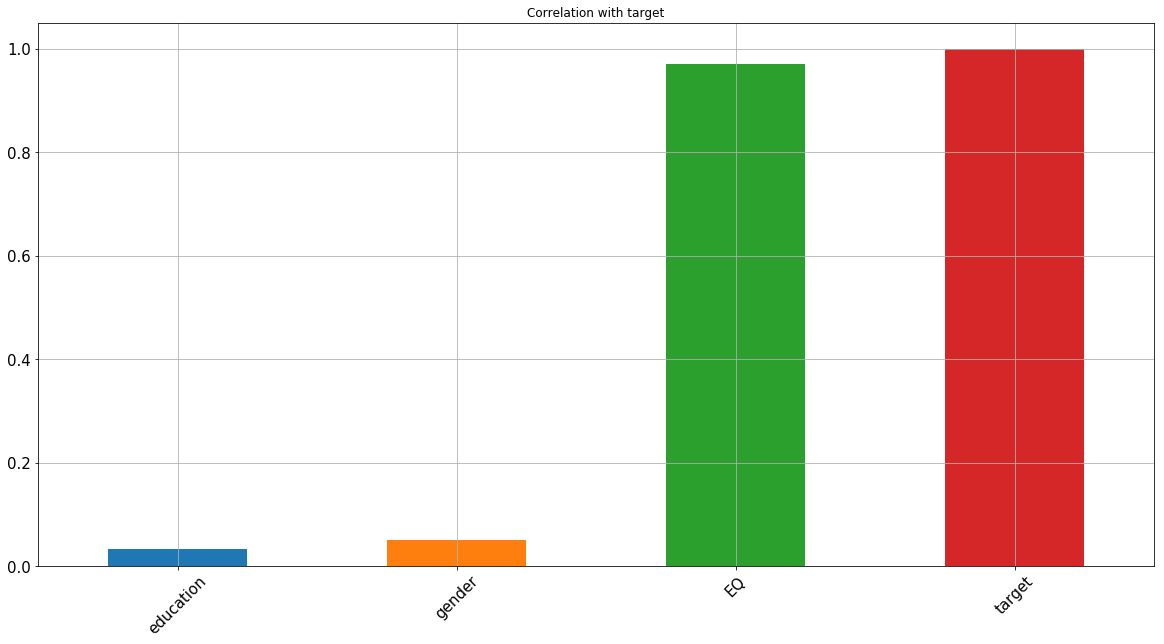

In [31]:
df.corrwith(df["target"]).plot.bar(
        figsize = (20, 10), title = "Correlation with target", fontsize = 15, rot = 45, grid = True)

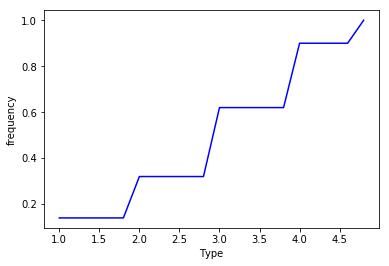

In [32]:
values, base = np.histogram(df['target'], bins=20)
kumulativ = np.cumsum(values/df.shape[0])
plt.plot(base[:-1], kumulativ, c='blue')
plt.xlabel('Type')
plt.ylabel('frequency')
plt.show()

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


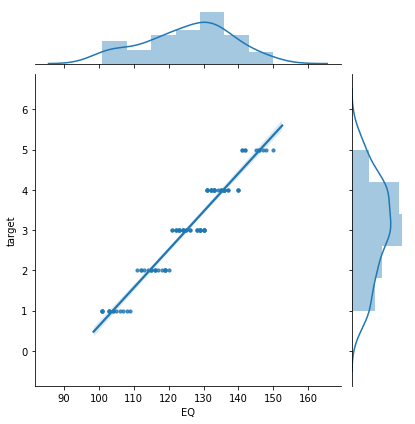

In [34]:
new_df = df[['EQ', 'target']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="EQ", y="target", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


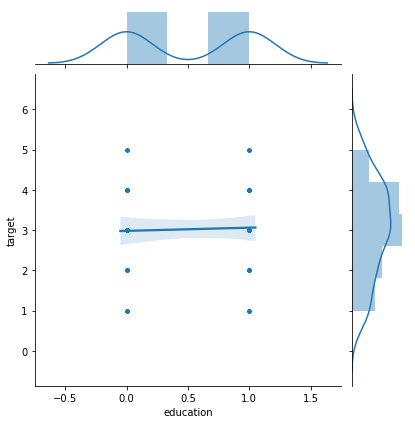

In [36]:
new_df = df[['education', 'target']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="education", y="target", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


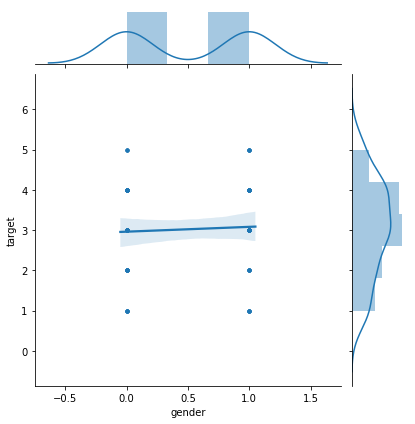

In [37]:
new_df = df[['gender', 'target']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="gender", y="target", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

shape of cov=(3, 3)


,L1,L2,L3
education,-0.173128,9.695637e-01,-0.173128
gender,-0.685585,-2.448393e-01,-0.685585
EQ,-0.707107,-3.964385e-15,0.707107


,PC1,PC2,PC3
0,-2.170450,0.724724,0.453025
1,-1.186792,0.724724,-0.530634
2,-0.897480,0.724724,-0.819945
3,-1.418241,0.724724,-0.299185
4,-1.244654,0.724724,-0.472771


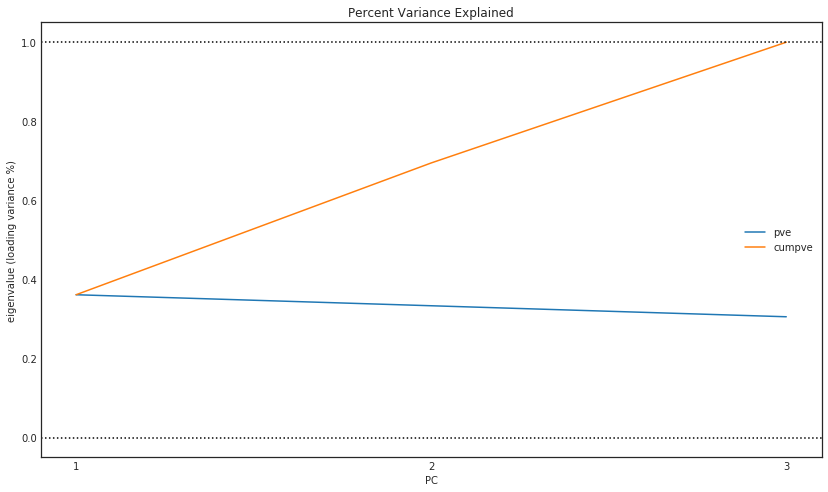

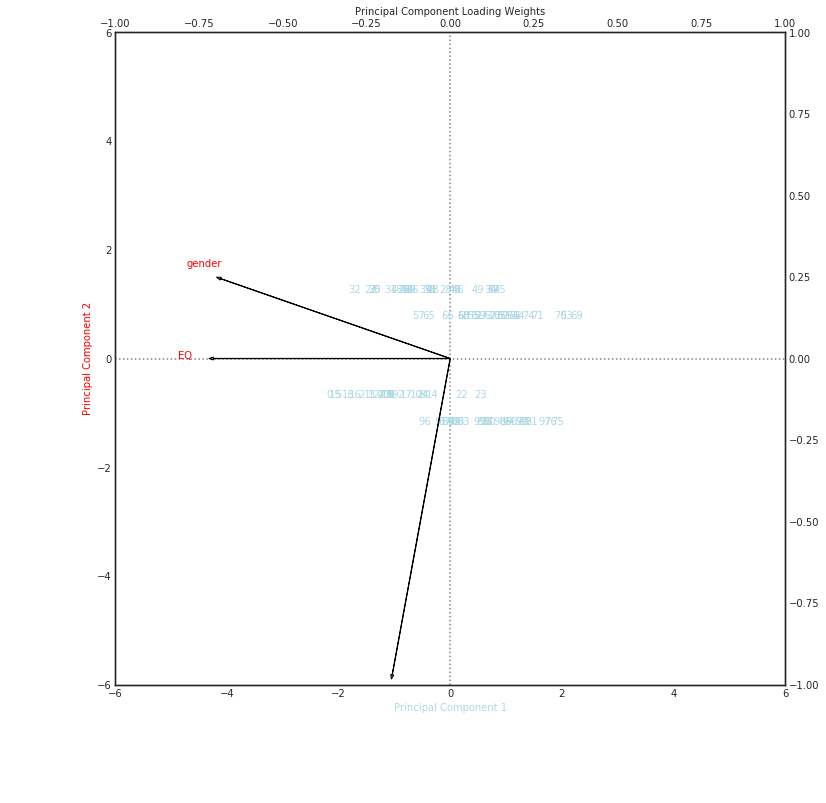

In [38]:
# Principal Component Analysis to find most important features
X = df.drop('target',axis=1)
X
# step 1: center and normalize features 
C = (X-np.mean(X))/np.std(X)
C
# step 2: compute covariance matrix of centered features
V = np.cov(C.T)
V
print('shape of cov={}'.format(V.shape))
# step 3: compute PC loadings (directions in feature space which have most variation)
eigvals,eigvecs = np.linalg.eig(V)
# enforce descending variance (eigenvalues)
ix = eigvals.argsort()[::-1] 
eigvals,eigvecs = eigvals[ix],eigvecs[:,ix]
loadingsheader = ['L'+str(i) for i in range(1,len(X.columns)+1)]
loadingsdf = pd.DataFrame(eigvecs,columns=loadingsheader,index=X.columns)
display(loadingsdf)
# step 4: compute PCs (i.e. scores: project features X onto loading vectors)
scores = loadingsdf.values.T.dot(C.T)
scoresheader = ['PC'+str(i) for i in range(1,len(C.columns)+1)]
scoresdf = pd.DataFrame(scores.T,columns=scoresheader,index=C.index)
display(scoresdf.head())
def screeplot(eigvals):
    '''
    function which computes percent variance explained plot
    eigvals   : eigenvalues returned by PCA
    '''
    with plt.style.context('seaborn-white'):
        f,ax=plt.subplots(figsize=(14,8))
        x = np.arange(1,len(eigvals)+1,1)
        ax.set_xticks(x)
        totalvar = eigvals.sum()
        pve = eigvals/totalvar
        cumpve = np.cumsum(pve)
        ax.plot(x,pve,label='pve')
        ax.plot(x,cumpve,label='cumpve')
        ax.set(title='Percent Variance Explained',xlabel='PC',ylabel='eigenvalue (loading variance %)')
        ax.axhline(y=0,color='k',linestyle='dotted')
        ax.axhline(y=1,color='k',linestyle='dotted')
        ax.legend(loc='best')

def biplot(loadingdf,scoredf,loadcolor='',scorecolor='',load_axlim=7,score_axlim=7,load_arrows=4):
    '''
    functon which plots first two PCs
    loadingdf        : loading vectors, DataFrame
    scoredf          : score vectors, DataFrame
    load,score_color : color of loadings,scores,str
    load,score_axlim : scale of loading,score axes, flt
    load_arrows      : size of loading arrow heads, flt
    '''
    with plt.style.context('seaborn-white'):
        f = plt.figure(figsize=(12,12))
        ax0 = plt.subplot(111)
        for ix in scoredf.index:
            # scatter scores onto 2d surface
            ax0.annotate(ix,(scoredf['PC1'][ix],-scoredf['PC2'][ix]),ha='center',color=scorecolor)
        ax0.set(xlim=(-score_axlim,score_axlim),ylim=(-score_axlim,score_axlim))
        ax0.set_xlabel('Principal Component 1',color=scorecolor)
        ax0.set_ylabel('Principal Component 2',color=loadcolor)
        # add ref line sthrough origin
        ax0.hlines(y=0,xmin=-score_axlim,xmax=score_axlim,linestyle='dotted',color='grey')
        ax0.vlines(x=0,ymin=-score_axlim,ymax=score_axlim,linestyle='dotted',color='grey')
        # overlay first two loading vector weights
        ax1 = ax0.twinx().twiny()
        ax1.set(xlim=(-load_axlim,load_axlim),ylim=(-load_axlim,load_axlim))
        ax1.tick_params(axis='y',color='red')
        ax1.set_xlabel('Principal Component Loading Weights')
        offset_scalar = 1.15
        for feature in loadingdf.index:
            ax1.annotate(feature,(loadingdf['L1'].loc[feature]*offset_scalar,-loadingdf['L2'].loc[feature]*offset_scalar),color=loadcolor)
        # display PCs as arrows
        for i in range(0,load_arrows):
            ax1.arrow(x=0,y=0,dx=loadingdf['L1'][i],dy=-loadingdf['L2'][i],head_width=0.009,shape='full')
screeplot(eigvals)
biplot(loadingsdf,scoresdf,loadcolor='red',scorecolor='lightblue',load_axlim=1,score_axlim=6,load_arrows=len(loadingsdf.columns))

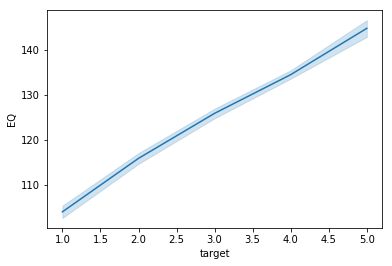

In [39]:
# conda install -c anaconda seaborn=0.9.0
sns.lineplot(x = 'target', y = 'EQ', data = df)

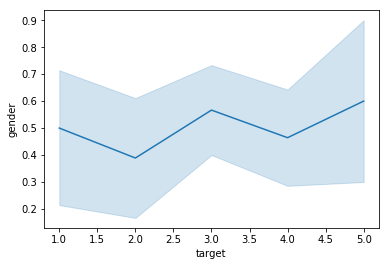

In [40]:
sns.lineplot(x = 'target', y = 'gender', data = df)

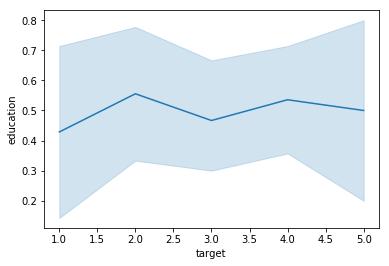

In [41]:
sns.lineplot(x = 'target', y = 'education', data = df)

In [35]:
df.columns

Index(['education', 'gender', 'EQ', 'target'], dtype='object')

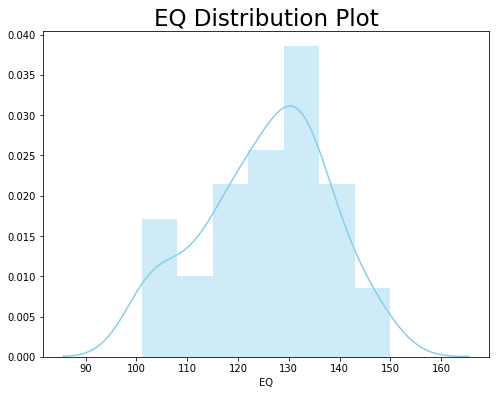

In [42]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('EQ Distribution Plot',fontsize=23)
sns.distplot(df['EQ'], color='skyblue')

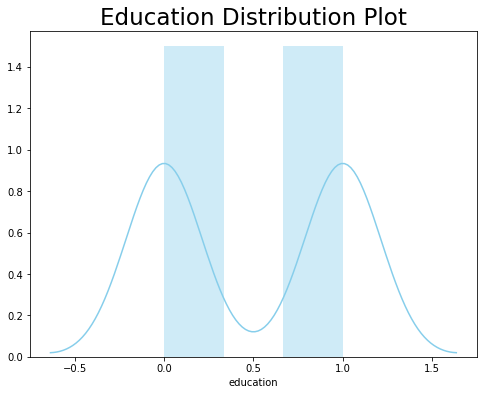

In [43]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Education Distribution Plot',fontsize=23)
sns.distplot(df['education'], color='skyblue')

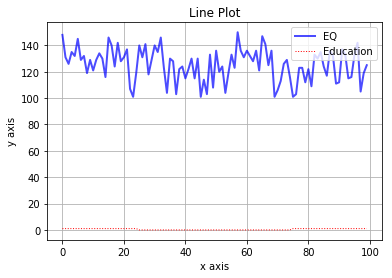

In [44]:
df["EQ"].plot(kind="line", color='b' ,label="EQ",linewidth=2 ,alpha=0.7,grid=True,linestyle="-" )
df["education"].plot(color='r',label="Education", linewidth=1, alpha=1 ,grid=True, linestyle=":")

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

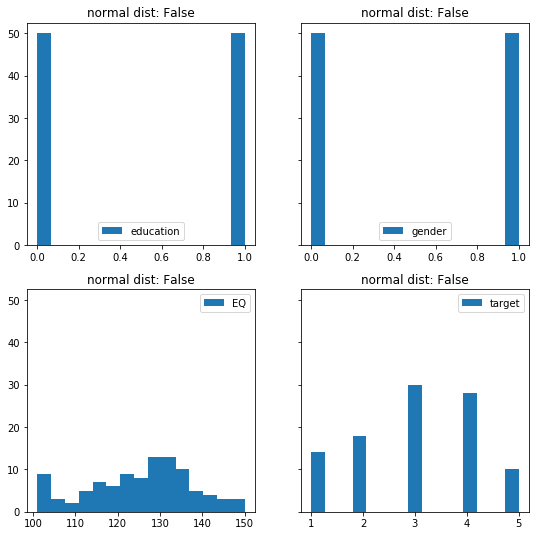

In [46]:
from scipy.stats import pearsonr, spearmanr, kendalltau, shapiro, pointbiserialr

col_names, cn = df.columns, 0
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(9,9))
for row in ax:
    for cell in row:
        cell.hist(df[col_names[cn]], label=col_names[cn], bins=15)
        norm = shapiro(df[col_names[cn]])[1]>0.05
        cell.set_title('normal dist: ' + str(norm))
        cell.legend()
        cn+=1

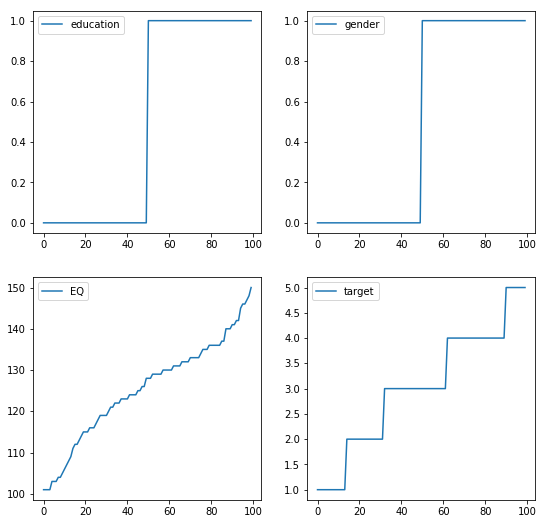

In [48]:
col_names, cn = df.columns, 0
fig, ax = plt.subplots(2, 2, figsize=(9,9))
for row in ax:
    for cell in row:
        sv = df[col_names[cn]].sort_values().tolist()
        cell.plot(sv, label=col_names[cn])
        cell.legend()
        cn+=1

In [49]:
correlation = df.corr()
correlation['target'].sort_values(ascending=False)

target       1.000000
EQ           0.970675
gender       0.050358
education    0.033572
Name: target, dtype: float64

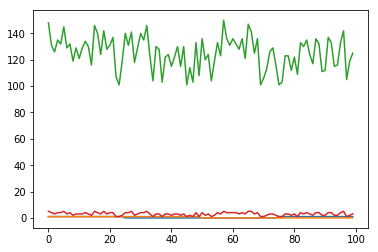

In [50]:
plt.plot(df)

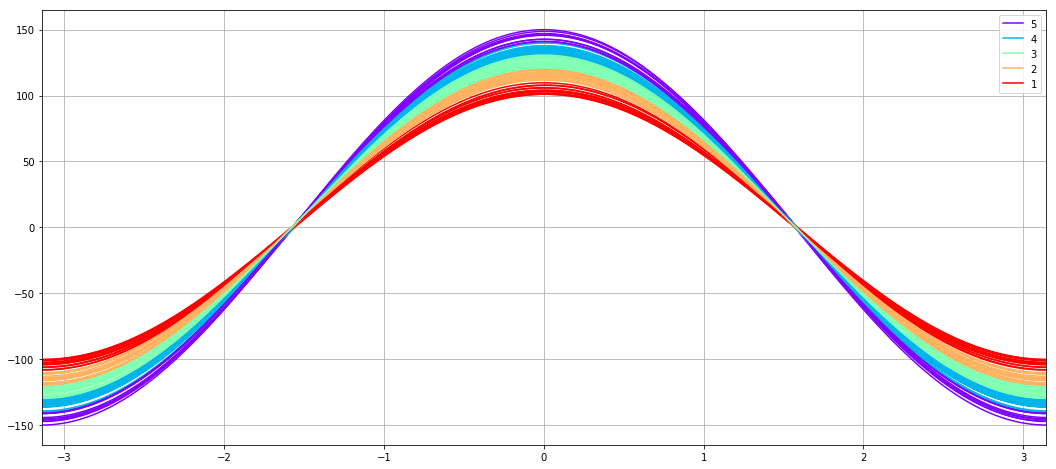

In [51]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
plt.figure(figsize=(18,8))
andrews_curves(df, "target", colormap='rainbow')

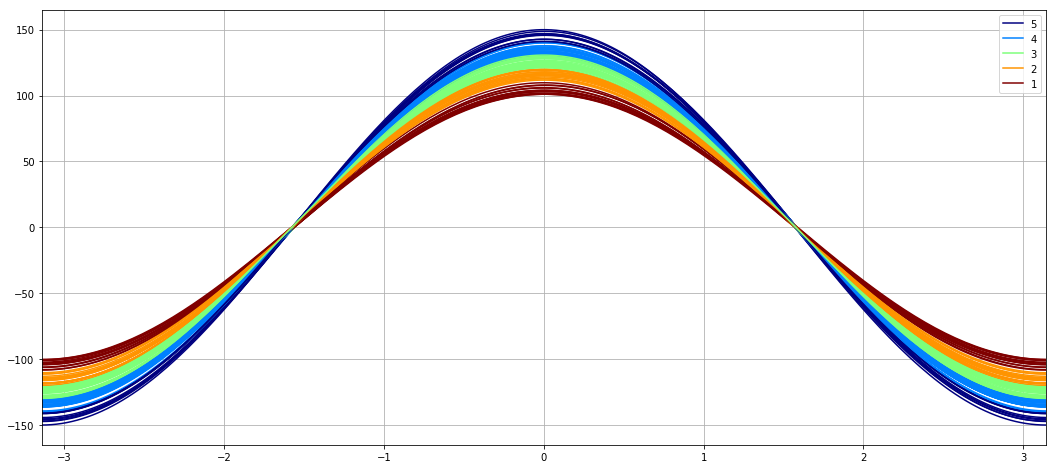

In [52]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
plt.figure(figsize=(18,8))
andrews_curves(df, "target", colormap='jet')

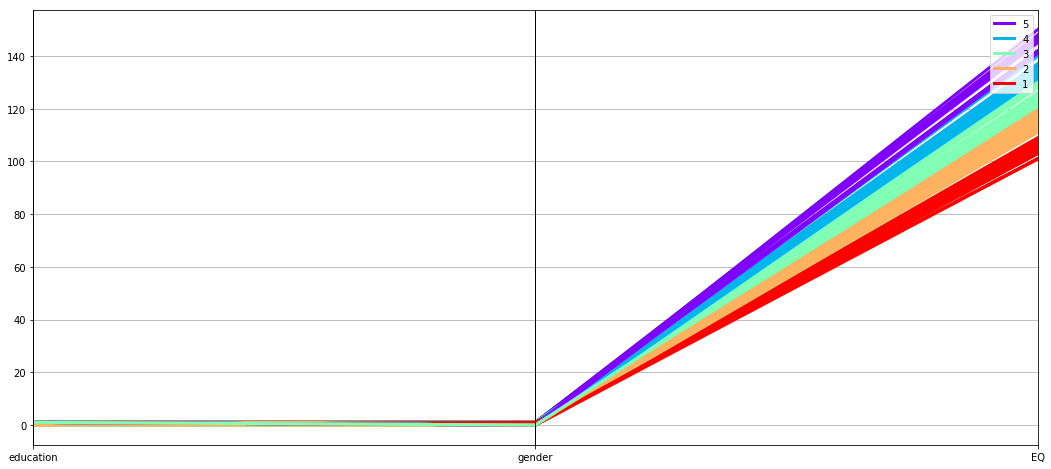

In [53]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
plt.figure(figsize=(18,8))
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, "target", colormap='rainbow', linewidth=3)

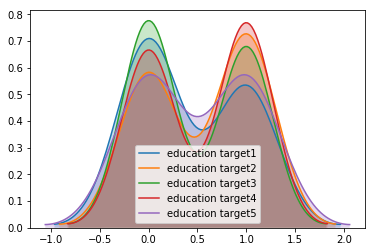

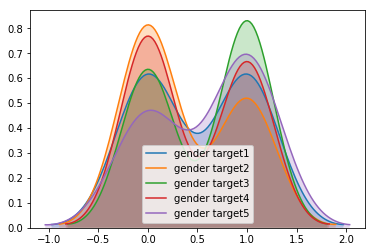

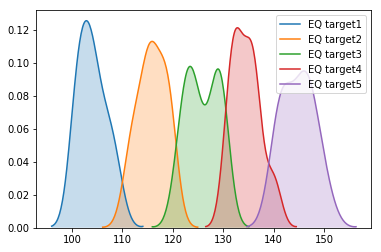

In [54]:
for feature in df.columns[:-1]:
    for j in range(1,9):
        try:
            sns.kdeplot(df[df["target"]==j][feature],label=feature+" target"+str(j),shade=True)
        except:
            pass
#     plt.xlabel("concentration")
    plt.show()